<a href="https://colab.research.google.com/github/shreyasbhojane10/Artificial-Intelligence/blob/main/Regression_with_Keras(PowerPlant_PredictionModel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## change the Runtime -> change runtime type -> T4 GPU

Data Ingetion

In [2]:
import pandas as pd
path = 'https://raw.githubusercontent.com/shreyasbhojane10/Datasets/refs/heads/main/PowerPlant.csv'
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Target feature : PE (Power Energy output)

Perform basic quality checks (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.duplicated().sum()

np.int64(41)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


## Seprate out X and Y features

In [8]:
X = df.drop(columns=['PE'])
y = df[['PE']]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Cleaning

In [11]:
from sklearn.pipeline import make_pipeline # pipelines allows us to perform multiple tasks on data
from sklearn.preprocessing import StandardScaler # this performs scaling of numerical data
from sklearn.impute import SimpleImputer # this handles data cleaning

## SimpleImputer : use for data cleaning ( mean median mode )

In [12]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()).set_output(transform='pandas')

as we have contigeous data hamari strategy 'mean' rahegi to clean data .        StandardScaler = encoding ke liye
   out put data ham pandas me le rahe hai otherwise it will give itin array

In [13]:
X_pre = num_pipe.fit_transform(X)

# fit_transform :
#    fit = data ko fit karega (mean\encoded data)
#    transform = unchanges ko apply karega(fit wale)


Perform train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_pre,y,train_size=0.70,random_state=42)

In [15]:
x_train.head()

,AT,V,AP,RH
4104,0.233984,1.102552,-0.847963,-0.889654
471,0.701474,0.758068,-0.644267,0.302261
1906,-0.910561,-1.076289,1.266438,1.317545
8487,0.693414,1.622037,-0.497808,0.014038
801,0.076810,-0.176847,-0.183004,-1.769385


In [16]:
y_train.head()

,PE
4104,450.22
471,447.28
1906,474.58
8487,434.46
801,457.57


In [17]:
x_test.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [18]:
y_test.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [19]:
x_train.shape

(6668, 4)

In [20]:
y_train.shape

(6668, 1)

In [21]:
x_test.shape

(2859, 4)

In [22]:
x_train.shape

(6668, 4)

## Model Building with Keras


In [23]:
from keras.models import Sequential
from keras.layers import Input,Dense    # dense is a hidden/output layer

In [24]:
x_train.shape

(6668, 4)

In [25]:
x_train.shape[0]

6668

In [26]:
x_train.shape[1]

4

In [27]:
# Intialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(x_train.shape[1],)))       # x_train.shape[1] means: 4 features pass kr rhe

# Add the Hidden layer 1
model.add(Dense(units=8,activation="relu"))       # Dense unit 8: 8 hidden layers pe try kr rhe (try and error)

# Add the Hidden Layer2
model.add(Dense(units=4,activation="relu"))       # Dense unit 4: 4 hidden layers pe try kr rhe (phir 4ke sath try&error karenge)

# Add the output layer
model.add(Dense(units=1,activation="linear"))     # after hidden layer Output ka 1 hi unit hoti hai | regression kar rhe iss liye activation : linear

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

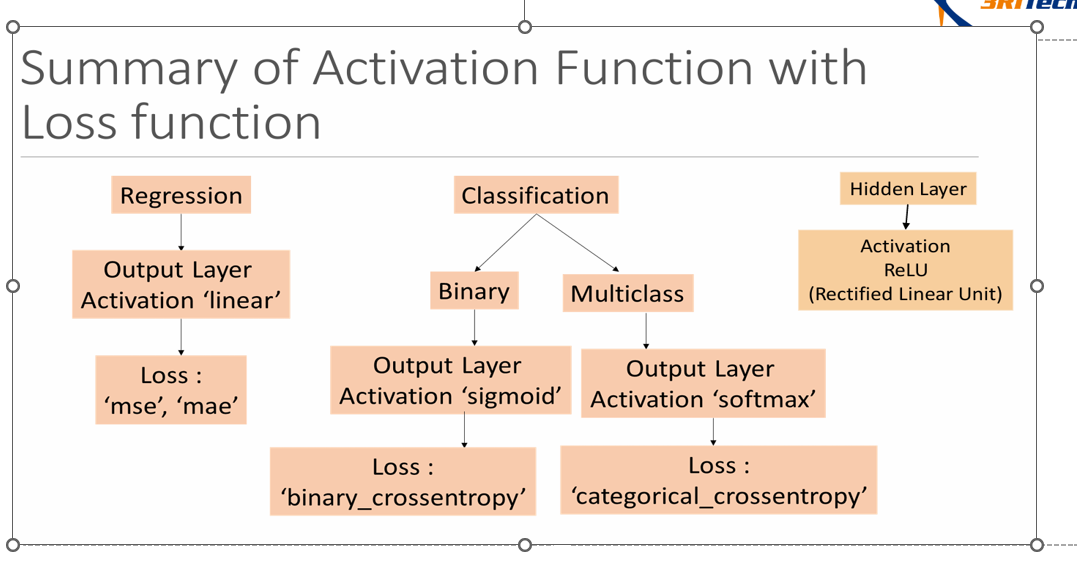

In [29]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

Machine Learning: Dataset is divided into training and testing . Model is trained only on training data

Deep Learning: Dataset is divided into training and testing. Model is trained after splitting training data further into training and validating.

e.g. train_test_split(train_size=0.70) iss 70% me se further validation ke liye (validation_split=0.2) 20% nikala jayega in deep learning

epochs : number of cycles we want to perform (i/p ->hidden-> o/t)layers

In [31]:
hist = model.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 206801.1094 - mae: 454.4384 - val_loss: 204608.7969 - val_mae: 452.0329
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 204692.7031 - mae: 452.1449 - val_loss: 200131.3594 - val_mae: 447.1303
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 198516.9219 - mae: 445.3462 - val_loss: 188720.6094 - val_mae: 434.2952
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184215.1250 - mae: 429.0162 - val_loss: 168170.7188 - val_mae: 409.5118
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 161189.6875 - mae: 400.4538 - val_loss: 141064.3906 - val_mae: 372.3785
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 132408.8906 - mae: 359.2526 - val_loss: 112728.3203 - val_mae: 325.0803
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104766.8516 - mae: 310.5498 - val_loss: 89208.9453 - val_mae: 275.3065
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83134.12

for this above : we select Runtime = T4 GPU because normal CPU se itni layers run krne me bohot time lagta hai. GPU ke sath it will be Faster

val_mae(validation loss) hame kam krna hota hai : as you see above last 3.5962

## Evaluate the Model

In [34]:
model.evaluate(x_train,y_train)      # On Training data

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.7394 - mae: 3.6553


[21.04306983947754, 3.6486077308654785]

In [35]:
model.evaluate(x_test,y_test)        # On Testing data

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4121 - mae: 3.6321


[21.20451545715332, 3.6911284923553467]

## Learning Curv

Text(0.5, 1.0, 'Learning Curve')

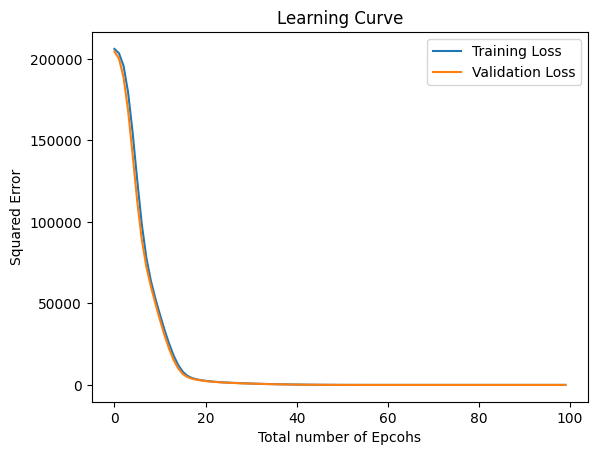

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Total number of Epcohs")
plt.legend()
plt.ylabel("Squared Error")
plt.title("Learning Curve")

Here, as we are increasing Epcohs training&validation loss is decreasing. | So, above Learning curve states that model is learning properly. Will use this model for final predictions

This curv must be overlap on eachother, othervise it will consider as Overfitting

In [41]:
ypred_test =model.predict(x_test)
ypred_test[:5]                             # Predicted data

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[427.93185],
       [481.93863],
       [483.8373 ],
       [450.7518 ],
       [447.01364]], dtype=float32)

In [66]:
Predicted = ypred_test
Predicted[:5].round(2)             #round(2) will roundup values

array([[427.93],
       [481.94],
       [483.84],
       [450.75],
       [447.01]], dtype=float32)

In [40]:
y_test.head()                              # OG data

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [67]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [70]:
X["PE_Predicted"] = Predicted                       # xnew["PE_Predicted"] : will create new column in dataframe
X["PE_Predicted"] = X["PE_Predicted"].round()       # .round() use to roundup values
X.head()

ValueError: Length of values (2859) does not match length of index (9527)

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
#Training Data Validation
ypred_train = model.predict(x_train)
r2score_train = r2_score(y_train,ypred_train)
mse_train = mean_squared_error(y_train,ypred_train)
mae_train = mean_absolute_error(y_train,ypred_train)
print("Training Data Evaluation")
print(f"Mean Squared Error {mse_train}")
print(f"Mean Absolute Error {mae_train}")
print(f"R2 Score {r2score_train}")

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training Data Evaluation
Mean Squared Error 21.043067932128906
Mean Absolute Error 3.648607015609741
R2 Score 0.9269705414772034


In [47]:
#Testing Data Validation
r2score = r2_score(y_test,ypred_test)
mse = mean_squared_error(y_test,ypred_test)
mae = mean_absolute_error(y_test,ypred_test)
print("Testing Data Evaluation")
print(f"Mean Squared Error {mse}")
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2score}")

Testing Data Evaluation
Mean Squared Error 21.204511642456055
Mean Absolute Error 3.691128969192505
R2 Score 0.92816162109375


#Model is providing R2 score of 93%.

In [48]:
model.save("PowerPlant_PredictionModel.keras")

# Now, We have saved this model and we can use this model for predictions on other Datasets

now, we are taking new dataset for testing but this dataset contains null values   

#Load the model |   This we can do on new Notebook also

In [49]:
from keras.models import load_model

In [51]:
model_loaded = load_model("/content/PowerPlant_PredictionModel.keras")

In [52]:
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

Here, we have loaded same model but this time from:
files(Googlecollab) -> PowerPlant_PredictionModel -> copy path -> paste in load model

summary we will gate exact same as above because we take same model


we are taking new dataset from github
path : Github(login) -> Datasets -> PowerPlantTest -> Raw -> copy path -> paste below

In [53]:
path = r"https://raw.githubusercontent.com/shreyasbhojane10/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(path)
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


# creating new pipeline

This is because, new data pe EDA perform nhi hua hai. new data may contain null values and all thats we transform it in xnew

In [54]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [55]:
final_preds = model_loaded.predict(xnew_pre)
final_preds = final_preds.round(2)                 # =final_preds.round(2){This step is optional}
final_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


array([[446.49],
       [527.58],
       [437.78]], dtype=float32)

In [56]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [57]:
final_preds

array([[446.49],
       [527.58],
       [437.78]], dtype=float32)

In [60]:
xnew["PE_Predicted"] = final_preds                       # xnew["PE_Predicted"] : will create new column in dataframe
xnew["PE_Predicted"] = xnew["PE_Predicted"].round()       # .round() use to roundup values
xnew

,AT,V,AP,RH,PE_Predicted
0,25,51.5,1000.1,57.0,446.0
1,32,41.0,1051.1,80.0,528.0
2,28,NaN,1010.2,NaN,438.0


In [61]:
xnew.to_csv("Final_Predictions.csv",index=False)

By using above step, we can save Final_Predictions in csv file